# 住宅価格の予測
住宅価格の回帰

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト
分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

データセットの準備
Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。

回帰問題の流れ
回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説GrLivAreaとYearBuiltの2つだけを利用することにします。

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [33]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
train=pd.read_csv("/Users/wakaichiaki/diveintocode-ml/diveintocode-ml/Week04/train.csv")

In [8]:
#X=df[["GrLivArea", "YearBuilt"]]
#y=df[["SalePrice"]]

In [17]:
X=train.loc[:,["GrLivArea","YearBuilt"]]
y=train.iloc[:,[-1]]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

データの確認

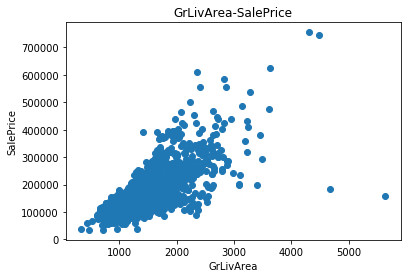

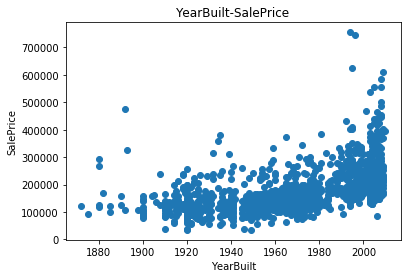

In [30]:
plt.scatter(X["GrLivArea"], y)
plt.title("GrLivArea-SalePrice")
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.title("YearBuilt-SalePrice")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X["YearBuilt"],y)
plt.show()

SalePriceとの相関係数はGtLivAreaの方が高めに出ている

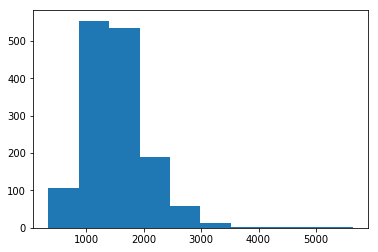

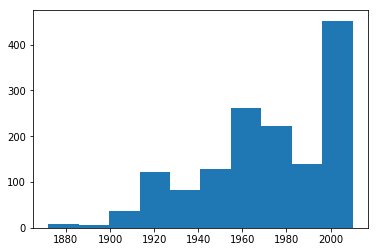

In [31]:
plt.hist(X["GrLivArea"])
plt.show()

plt.hist(X["YearBuilt"])
plt.show()  

In [19]:
#データの分割
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=9)

In [32]:
#データの学習
lr=LinearRegression()
lr.fit(X_train,y_train)
#推定
y_pred=lr.predict(X_test)
#平均２乗誤差
print("MSE:{}".format(mean_squared_error(y_test,y_pred)))

MSE:2081008310.9659219


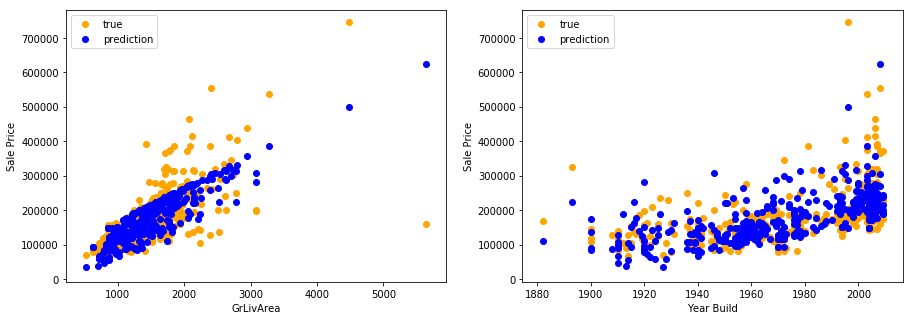

In [63]:
#可視化
fig, ax=plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(X_test['GrLivArea'], y_test, color='orange', label='true')
ax[0].scatter(X_test['GrLivArea'], y_pred, color='blue', label='prediction')
ax[0].set_xlabel('GrLivArea')
ax[0].set_ylabel('Sale Price')
ax[0].legend(loc='upper left')

ax[1].scatter(X_test['YearBuilt'], y_test, color='orange', label='true')
ax[1].scatter(X_test['YearBuilt'], y_pred, color='blue', label='prediction')
ax[1].set_xlabel('Year Build')
ax[1].set_ylabel('Sale Price')
ax[1].legend(loc='upper left')
plt.show()

## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。



Linear Regression
MSE:2081008310.9659219


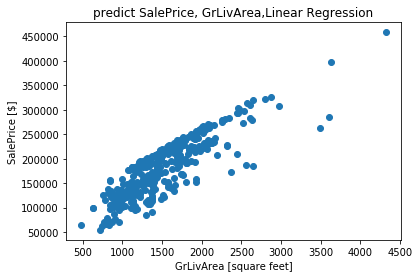

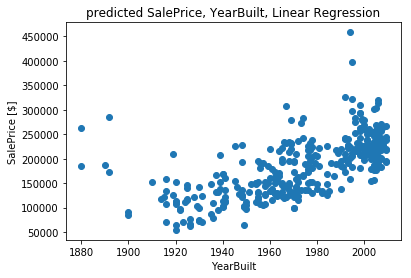

SVM
MSE:7046655738.620027


/Users/wakaichiaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wakaichiaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


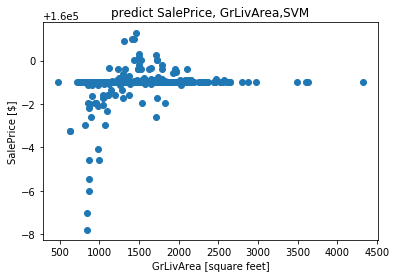

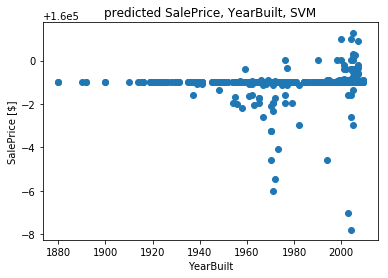

Decision Tree
MSE:2335163985.626104


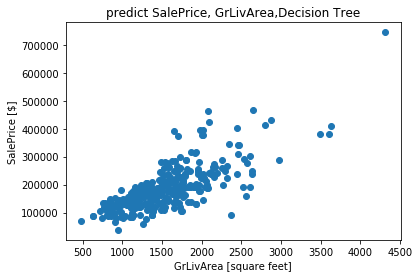

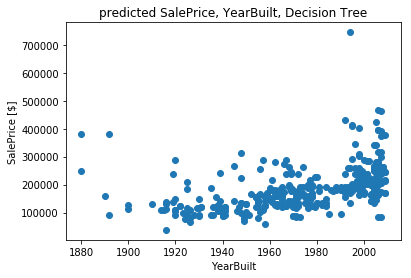

Random Forest
MSE:1690523377.7543008


/Users/wakaichiaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wakaichiaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


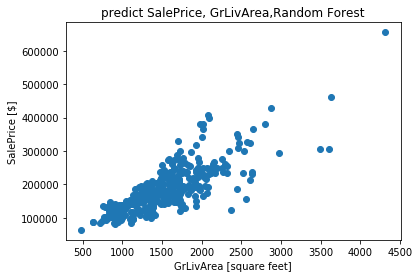

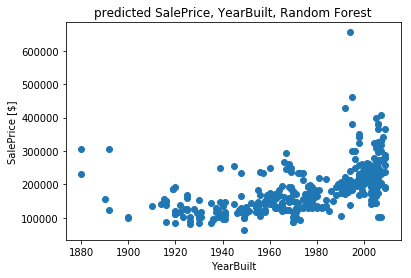

In [35]:
#インスタンス化
svr=SVR()
tree=DecisionTreeRegressor()
random_forest=RandomForestRegressor()

#モデルリスト
models=[lr,svr,tree,random_forest]
model_names=["Linear Regression", "SVM", "Decision Tree", "Random Forest"]
mse_list=[]

for model,model_name in zip(models,model_names):
    print(model_name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse_list.append(mean_squared_error(y_test,y_pred))
    print("MSE:{}".format(mse_list[-1]))
    
    plt.title("predict SalePrice, GrLivArea,{}".format(model_name))
    plt.xlabel("GrLivArea [square feet]")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test["GrLivArea"],y_pred)
    plt.show()
    
    plt.title("predicted SalePrice, YearBuilt, {}".format(model_name))
    plt.xlabel("YearBuilt")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test["YearBuilt"], y_pred)
    plt.show()

パラメータを指定しない状態でのモデル比較において、平均二乗誤差が最小なモデルは、ランダムフォレストだとわかった。